# Assignment 04
# KOIDALA SURYA PRAKASH
## EE18BTECH11026

In [10]:
from scipy import stats as stats_scipy
import numpy as np
import matplotlib.pyplot as plt
from astropy import stats as stats_astropy
from astroML import stats as stats_astroML
from scipy.optimize import curve_fit

# Q1

In [15]:
### HELPER FUNCS 

## function calls for models 
def linear(x,m,b) : 
    return m*x + b

def quad(x, a,b ,c):
    return a*(x**2) + b*x + c

def cubic(x, a,b,c,d):
    return a*(x**3) + b*(x**2) + c*x + d

def likelihood(param, model):
    if model=='linear':
        y = linear(X, *param)
    elif model=='quadratic':
        y = quad(X, *param)
    elif model=='cubic':
        y = cubic(X, *param)
    return sum(stats_scipy.norm.logpdf(*args)
               for args in zip(Y, y, Sigma))

m_lin = 2
m_quad = 3
m_cubic = 4


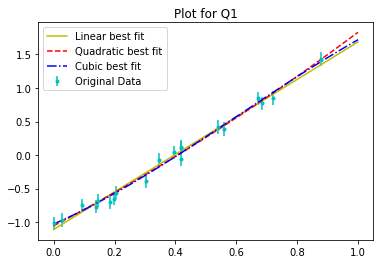

In [26]:

data = np.loadtxt('q1_data.dat')

X = data[:,0]
Y = data[:,1]
Sigma = data[:,2]

n = X.shape[0]


#Best fit parameters for linear  quad and cubic
optparam_lin, cov_lin = curve_fit(linear, X, Y, sigma=Sigma, absolute_sigma=True)
optparam_quad, cov_quad = curve_fit(quad, X, Y, sigma=Sigma, absolute_sigma=True)
optparam_cubic, cov_cubicicic = curve_fit(cubic, X, Y, sigma=Sigma, absolute_sigma=True)


#plotting
x = np.linspace(0,1,1000)
#Plot original data, lin best fit , quad best fit , cubic best fit

plt.errorbar(X, Y, yerr=Sigma, fmt=".", color = 'c', label='Original Data')
plt.plot(x, linear(x, *optparam_lin),'y-',label='Linear best fit')
plt.plot(x, quad(x, *optparam_quad),'r--', label='Quadratic best fit')
plt.plot(x, cubic(x, *optparam_cubic), 'b-.', label='Cubic best fit')
plt.title('Plot for Q1')
plt.legend()
plt.show()


In [27]:
#Frequentist comparision

chisq_lin = np.sum(((Y - linear(X, *optparam_lin))/Sigma)**2)
chisq_quad = np.sum(((Y - quad(X, *optparam_quad))/Sigma)**2)
chisq_cubic = np.sum(((Y - cubic(X, *optparam_cubic))/Sigma)**2)

#p-value when linear model is null hypothesis
pval_quad_lin = 1-stats_scipy.chi2(m_quad - m_lin).cdf(chisq_lin - chisq_quad)
pval_cubic_lin = 1-stats_scipy.chi2(m_cubic - m_lin).cdf(chisq_lin - chisq_cubic)

#AIC

#Considered dataset is small => take AIC values
AIC_lin = -2*likelihood(optparam_lin, 'linear') + (2.0*m_lin*n)/(n-m_lin-1)
AIC_quad = -2*likelihood(optparam_quad, 'quadratic') + (2.0*m_quad*n)/(n-m_quad-1)
AIC_cubic = -2*likelihood(optparam_cubic, 'cubic') + (2.0*m_cubic*n)/(n-m_cubic-1)                                                            
AIC_min = min([AIC_lin, AIC_quad, AIC_cubic])
delta_AIC_lin = AIC_lin - AIC_min
delta_AIC_quad = AIC_quad - AIC_min
delta_AIC_cubic = AIC_cubic - AIC_min

#BIC
BIC_lin = m_lin*np.log(n) - 2*likelihood(optparam_lin, 'linear')
BIC_quad =  m_quad*np.log(n)  -2*likelihood(optparam_quad, 'quadratic')
BIC_cubic = m_cubic*np.log(n) -2*likelihood(optparam_cubic, 'cubic')
BIC_min = min([BIC_lin, BIC_quad, BIC_cubic])
delta_BIC_lin = BIC_lin - BIC_min
delta_BIC_quad = BIC_quad - BIC_min
delta_BIC_cubic = BIC_cubic - BIC_min


print("p-value for preferred model for Quadratic & null hypothesis ie, Linear = ", pval_quad_lin)
print("p-value for preferred model for Cubic & null hypothesis ie, Linear = ", pval_cubic_lin)
print('\n')

print("AIC value for linear model = ", AIC_lin)
print("AIC value for quadratic model = ", AIC_quad)
print("AIC value fot cuboc model = ", AIC_cubic)
print('\n')
print("Delta AIC value for linear model = ", delta_AIC_lin)
print("Delta AIC value for quadratic model = ", delta_AIC_quad)
print("Delta AIC value fot cubic model = ", delta_AIC_cubic)
print('\n')                                               
print("BIC value for linear model = ", BIC_lin)
print("BIC value for quadratic model = ", BIC_quad)
print("BIC value fot cuboc model = ", BIC_cubic)
print('\n')
print("Delta BIC value for linear model = ", delta_BIC_lin)
print("Delta BIC value for quadratic model = ", delta_BIC_quad)
print("Delta BIC value fot cuboc model = ", delta_BIC_cubic)



p-value for preferred model for Quadratic & null hypothesis ie, Linear =  0.17813275695316733
p-value for preferred model for Cubic & null hypothesis ie, Linear =  0.32887884419522884


AIC value for linear model =  -39.33080446313153
AIC value for quadratic model =  -38.34982062400561
AIC value fot cuboc model =  -35.594151850935894


Delta AIC value for linear model =  0.0
Delta AIC value for quadratic model =  0.9809838391259191
Delta AIC value fot cubic model =  3.736652612195634


BIC value for linear model =  -38.04522226896472
BIC value for quadratic model =  -36.86262380334364
BIC value fot cuboc model =  -34.2778894233866


Delta BIC value for linear model =  0.0
Delta BIC value for quadratic model =  1.1825984656210835
Delta BIC value fot cuboc model =  3.7673328455781245


## Comments for Q1

## 1. Comparing models with linear

While considering Linear model as the null hypothesis, and comparing them with other two models : the p-vals are as follows

Comparing with Quadratic 0.17813275695316733 

Comparing with Cubic 0.32887884419522884

The p-values are quite higher (greater than 0.05) and thus we cannot reject the null hypothesis.

## 2. DELTA AIC vals


Delta AIC value for linear model =  0.0

Delta AIC value for quadratic model =  0.9809838391259191

Delta AIC value fot cubic model =  3.736652612195634

delta AIC for quad model lies in (0,2), thus the model has subtantial support
delta AIC for cubic model lies in (2,4), thus the model has less support


## 3. DELTA BIC vals


Delta BIC value for linear model =  0.0

Delta BIC value for quadratic model =  1.1825984656210835

Delta BIC value fot cuboc model =  3.7673328455781245

delta BIC for quad model lies in (0,2), thus the no evidence against the model

delta BIC for cubic model lies in (2,4), thus positive evidence against the model

# Q2

In [6]:
data = np.array([[ 0.42,  0.72,  0.  ,  0.3 ,  0.15,
                   0.09,  0.19,  0.35,  0.4 ,  0.54,
                   0.42,  0.69,  0.2 ,  0.88,  0.03,
                   0.67,  0.42,  0.56,  0.14,  0.2  ],
                 [ 0.33,  0.41, -0.22,  0.01, -0.05,
                  -0.05, -0.12,  0.26,  0.29,  0.39, 
                   0.31,  0.42, -0.01,  0.58, -0.2 ,
                   0.52,  0.15,  0.32, -0.13, -0.09 ],
                 [ 0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1  ]])
X, Y, Sigma = data

In [7]:
# free paramemter count for each model
m_lin , m_quad, m_cubic= 2,3,4
#find best parameters

#Best fit parameters for linear, quadratic & cubic 
optparam_lin, cov_lin = curve_fit(linear, X, Y, sigma=Sigma, absolute_sigma=True)
optparam_quad, cov_quad = curve_fit(quadratic, X, Y, sigma=Sigma, absolute_sigma=True)
n = X.shape[0]


def likelihood(param, model):
    if model=='linear':
        y = linear(X, *param)
    elif model=='quadratic':
        y = quadratic(X, *param)
    elif model=='cubic':
        y = cubic(X, *param)
    return sum(stats_scipy.norm.logpdf(*args)
               for args in zip(Y, y, Sigma))

#AIC
#Considered dataset is small => take AIC values
AIC_lin = -2*likelihood(optparam_lin, 'linear') + (2.0*m_lin*n)/(n-m_lin-1)
AIC_quad = -2*likelihood(optparam_quad, 'quadratic') + (2.0*m_quad*n)/(n-m_quad-1)                                                    
AIC_min = min([AIC_lin, AIC_quad])
delta_AIC_lin = AIC_lin - AIC_min
delta_AIC_quad = AIC_quad - AIC_min

#BIC
BIC_lin = m_lin*np.log(n) - 2*likelihood(optparam_lin, 'linear')
BIC_quad =  m_quad*np.log(n)  -2*likelihood(optparam_quad, 'quadratic')
BIC_min = min([BIC_lin, BIC_quad])
delta_BIC_lin = BIC_lin - BIC_min
delta_BIC_quad = BIC_quad - BIC_min


                                                             
print("AIC value for linear model : ", AIC_lin)
print("AIC value for quadratic model : ", AIC_quad)
print('\n')
print("Delta AIC value for linear model : ", delta_AIC_lin)
print("Delta AIC value for quadratic model : ", delta_AIC_quad)
print('\n')                                              
print("BIC value for linear model : ", BIC_lin)
print("BIC value for quadratic model : ", BIC_quad)
print('\n')
print("Delta BIC value for linear model : ", delta_BIC_lin)
print("Delta BIC value for quadratic model : ", delta_BIC_quad)


AIC value for linear model :  -39.31585166028409
AIC value for quadratic model :  -38.38302717300821


Delta AIC value for linear model :  0.0
Delta AIC value for quadratic model :  0.9328244872758802


BIC value for linear model :  -38.03026946611728
BIC value for quadratic model :  -36.89583035234624


Delta BIC value for linear model :  0.0
Delta BIC value for quadratic model :  1.1344391137710446


## Comments

Since delta AIC for quadratic model is in between (0,2) , we can conclude that quadratic model has a substatial support

While delta BIC for quadratic model is in between (0,2) , we can conclude that quadratic model has no evidence against itself.

Thus we can conclude that both metrics infer the same and thus , linear model cannot be rejected !!


# Q3

# Q4

In [28]:
## finding significance 

## ATLAS DISCOVERY : 1.7*10 POW -9
sign_1 = stats_scipy.norm.isf(1.7*10**-9)
## LIGO DISCOVERY P VAL : 2 *  10 POW -7
sign_2= stats_scipy.norm.isf(2*10**-7)
## GOF OF CHI SQ
p_val = stats_scipy.chi2(67).sf(65.2)

print('Significance of Higgs boson disc {}'.format(sign_1))
print('Significance of LIGO disc {}'.format(sign_2))
print('GOF of chisquare in best fit oscillation {}'.format(p_val))


Significance of Higgs boson disc 5.911017938341624
Significance of LIGO disc 5.068957749717791
GOF of chisquare in best fit oscillation 0.5394901931099036


# The End